In [1]:
from transformers import AutoModel
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Models

In [ ]:
# GPT-2
gpt2 = AutoModel.from_pretrained('gpt2-xl')
wpe_gpt = gpt2.wpe.weight.detach().numpy()
# BERT
bert = AutoModel.from_pretrained('bert-base-uncased')
wpe_bert = bert.embeddings.position_embeddings.weight.detach().numpy()

# Shapes

In [3]:
wpe_gpt.shape

(1024, 1600)

In [4]:
wpe_bert.shape

(512, 768)

# Statistics

In [5]:
pd.DataFrame(wpe_gpt.flatten()).describe()

0
count  1.638400e+06
mean  -1.019791e-04
std    1.516441e-02
min   -2.057268e+00
25%   -2.466520e-03
50%   -1.503477e-05
75%    2.432974e-03
max    1.274699e+00

In [6]:
pd.DataFrame(wpe_bert.flatten()).describe()

0
count  393216.000000
mean       -0.000039
std         0.016069
min        -0.948729
25%        -0.009345
50%        -0.000020
75%         0.009332
max         0.726892

# Histograms

## Figure Styling

In [7]:
# color map (dark around zero, bright on both extremes)
cmap='twilight'

# figure size and resolution
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 16})
# Choose a resolution for the figures.
# I used 300 to generate the figures for the blog post.
# But then used 80 to push this notebook to github, 
# otherwise github wouldn't render the notebook due to its size.
plt.rcParams["figure.dpi"] = 80
# plt.rcParams["figure.dpi"] = 300

## GPT-2

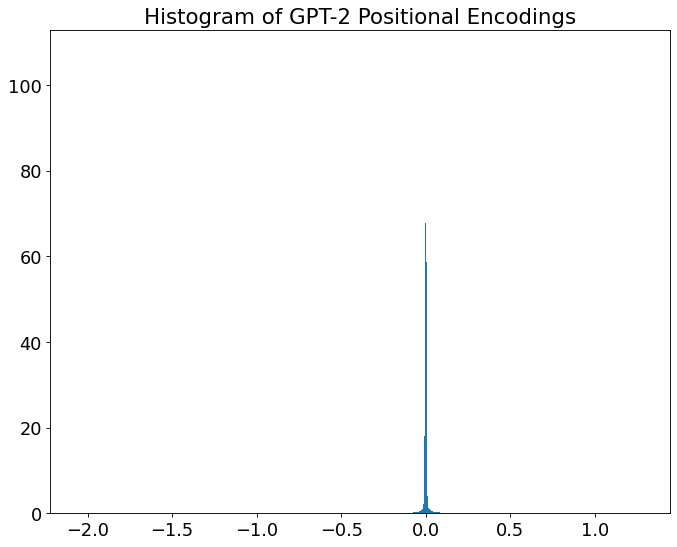

In [8]:
plt.hist(wpe_gpt.flatten(), bins=1000, density=True)
plt.title('Histogram of GPT-2 Positional Encodings')
plt.show()

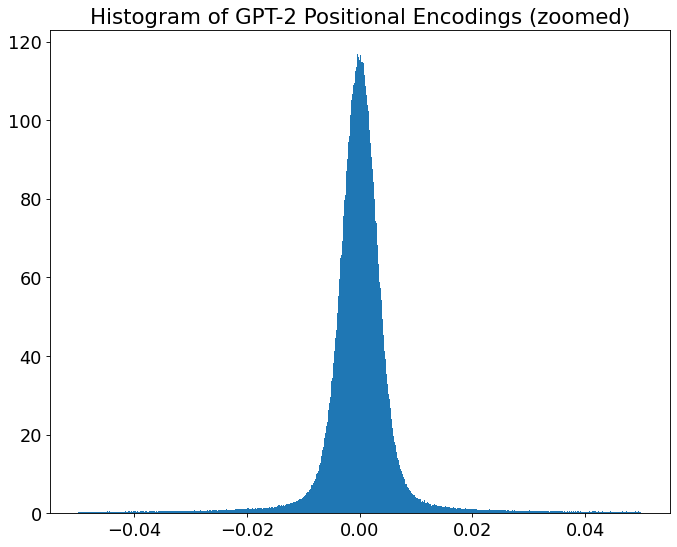

In [9]:
plt.hist(wpe_gpt.flatten(), bins=1000, range=[-0.05, 0.05], density=True)
plt.title('Histogram of GPT-2 Positional Encodings (zoomed)')
plt.show()

## BERT

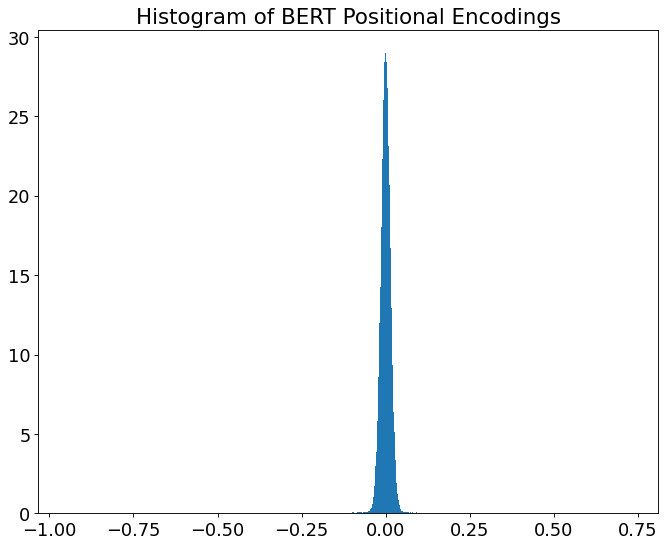

In [10]:
plt.hist(wpe_bert.flatten(), bins=1000, density=True)
plt.title('Histogram of BERT Positional Encodings')
plt.show()

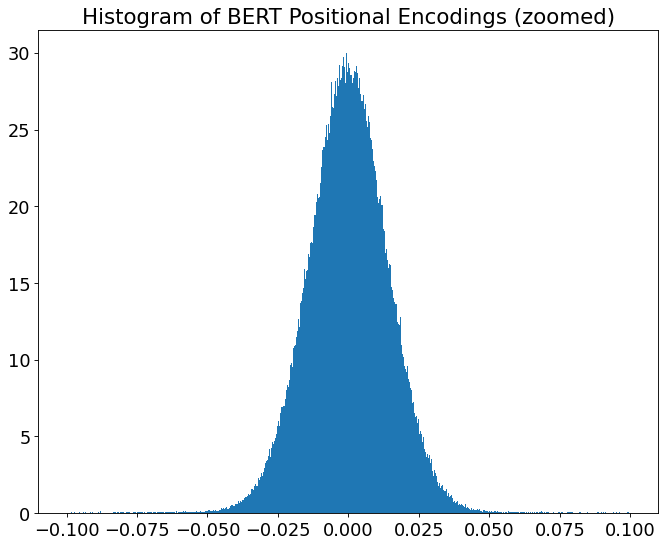

In [11]:
plt.hist(wpe_bert.flatten(), bins=1000, range=[-0.1, 0.1], density=True)
plt.title('Histogram of BERT Positional Encodings (zoomed)')
plt.show()

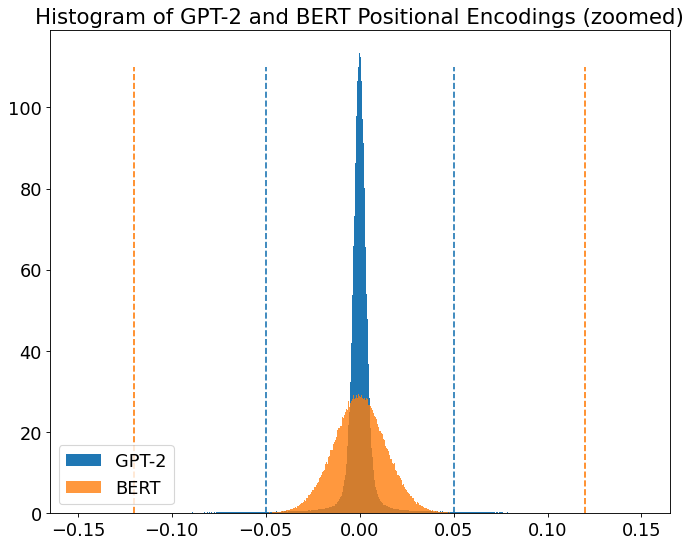

In [12]:
plt.hist(wpe_gpt.flatten(), bins=1000, range=[-0.15, 0.15], density=True, label='GPT-2', fc='tab:blue')
plt.hist(wpe_bert.flatten(), bins=1000, range=[-0.15, 0.15], density=True, label='BERT', alpha=0.8, fc='tab:orange')
plt.plot([-0.05,-0.05],[0,110], '--', c='tab:blue')
plt.plot([0.05,0.05],[0,110], '--', c='tab:blue')
plt.plot([-0.12,-0.12],[0,110], '--', c='tab:orange')
plt.plot([0.12,0.12],[0,110], '--', c='tab:orange')
plt.title('Histogram of GPT-2 and BERT Positional Encodings (zoomed)')
plt.legend()
plt.show()

# Visualizations of Positional Encodings

## GPT-2

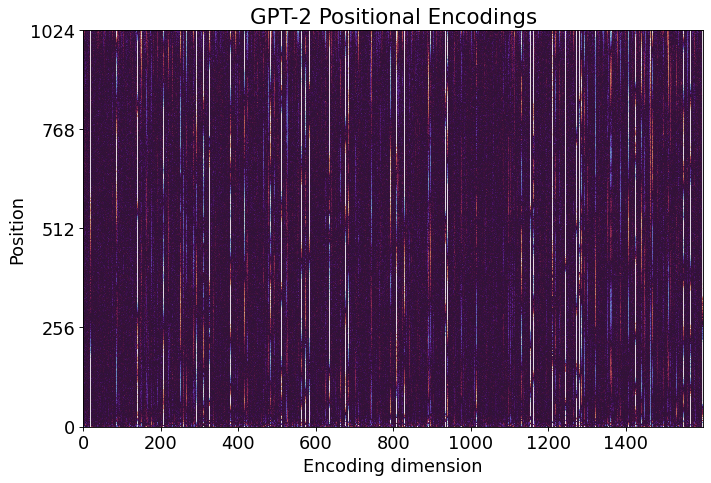

In [13]:
plt.imshow(wpe_gpt, vmin=-0.05, vmax=0.05, interpolation="none", origin='lower', cmap=cmap)
plt.yticks([0,256,512,768,1024])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('GPT-2 Positional Encodings')
plt.show()

## BERT

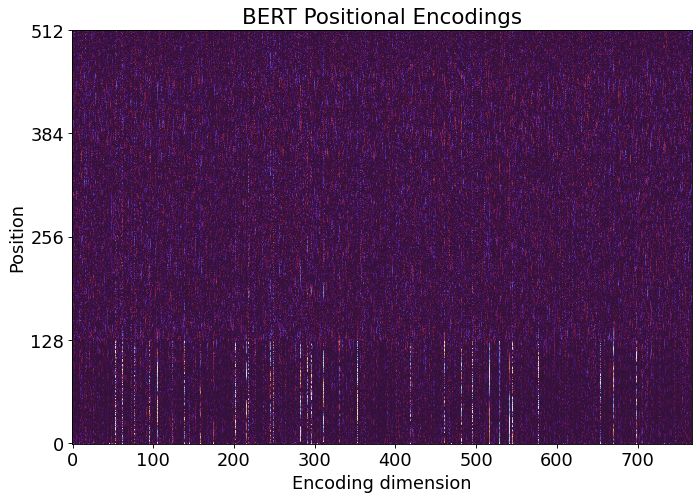

In [14]:
plt.imshow(wpe_bert, vmin=-.12, vmax=.12, interpolation="none", origin='lower', cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('BERT Positional Encodings')
plt.show()

## The impact of range

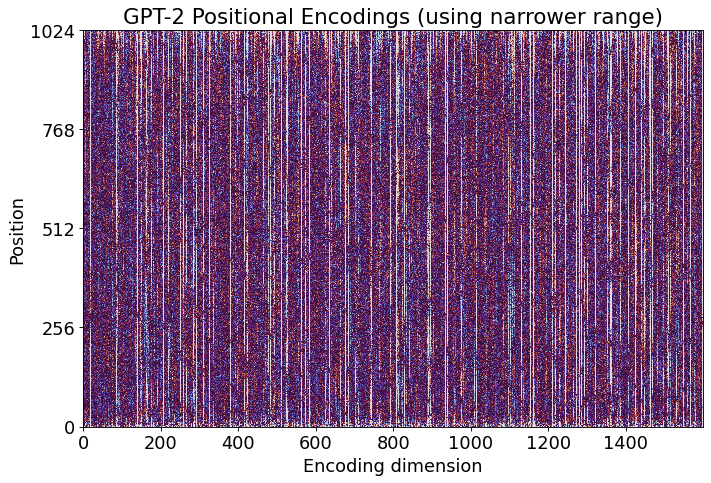

In [15]:
plt.imshow(wpe_gpt, vmin=-0.01, vmax=0.01, interpolation="none", origin='lower', cmap=cmap)
plt.yticks([0,256,512,768,1024])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('GPT-2 Positional Encodings (using narrower range)')
plt.show()

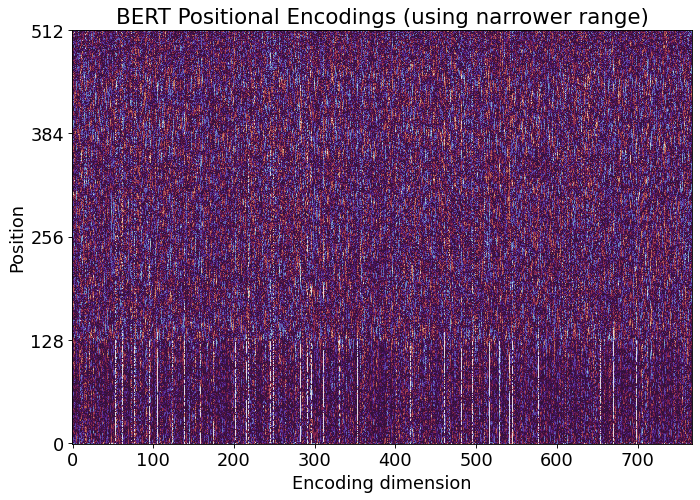

In [16]:
plt.imshow(wpe_bert, vmin=-.05, vmax=.05, interpolation="none", origin='lower', cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('BERT Positional Encodings (using narrower range)')
plt.show()

### No range at all

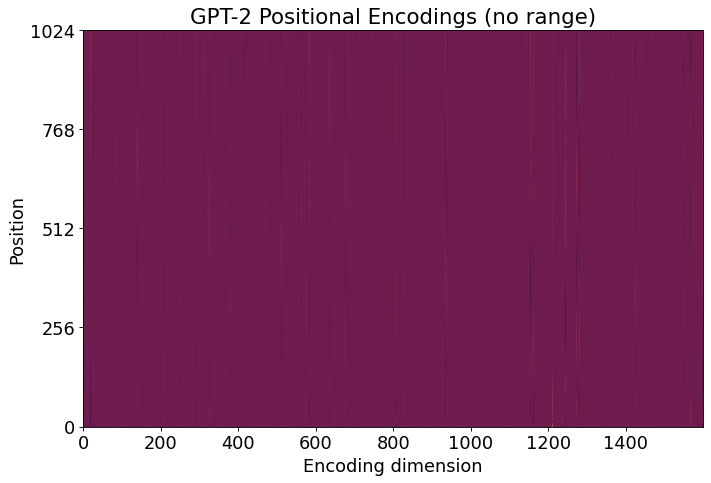

In [17]:
plt.imshow(wpe_gpt, interpolation="none", origin='lower', cmap=cmap)
plt.yticks([0,256,512,768,1024])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('GPT-2 Positional Encodings (no range)')
plt.show()

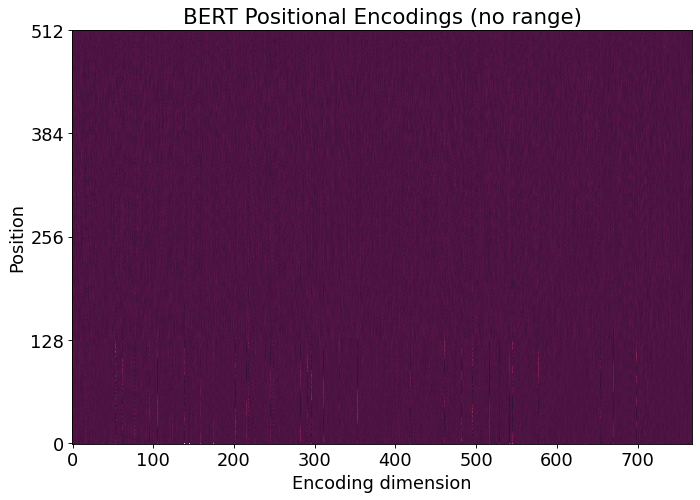

In [18]:
plt.imshow(wpe_bert, interpolation="none", origin='lower', cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('BERT Positional Encodings (no range)')
plt.show()

### Ratio of active features depending on the clip value

In [19]:
num_clipped_01 = ((wpe_gpt < -0.01) | (wpe_gpt > 0.01)).sum()
num_clipped_05 = ((wpe_gpt < -0.05) | (wpe_gpt > 0.05)).sum()
print(f'# clipped 0.01: {num_clipped_01} ({num_clipped_01/wpe_gpt.size})')
print(f'# clipped 0.05: {num_clipped_05} ({num_clipped_05/wpe_gpt.size})')
print(f'{num_clipped_01}/{num_clipped_05} = {num_clipped_01/num_clipped_05}')

# clipped 0.01: 153606 (0.093753662109375)
# clipped 0.05: 39351 (0.0240179443359375)
153606/39351 = 3.9034840283601433


In [20]:
num_clipped_12 = ((wpe_bert < -0.12) | (wpe_bert > 0.12)).sum()
num_clipped_05 = ((wpe_bert < -0.05) | (wpe_bert > 0.05)).sum()
print(f'# clipped 0.05: {num_clipped_05} ({num_clipped_05/wpe_bert.size})')
print(f'# clipped 0.12: {num_clipped_12} ({num_clipped_12/wpe_bert.size})')
print(f'{num_clipped_05}/{num_clipped_12} = {num_clipped_05/num_clipped_12}')

# clipped 0.05: 2846 (0.007237752278645833)
# clipped 0.12: 303 (0.00077056884765625)
2846/303 = 9.392739273927393


## Sorted by Norm

### GPT-2

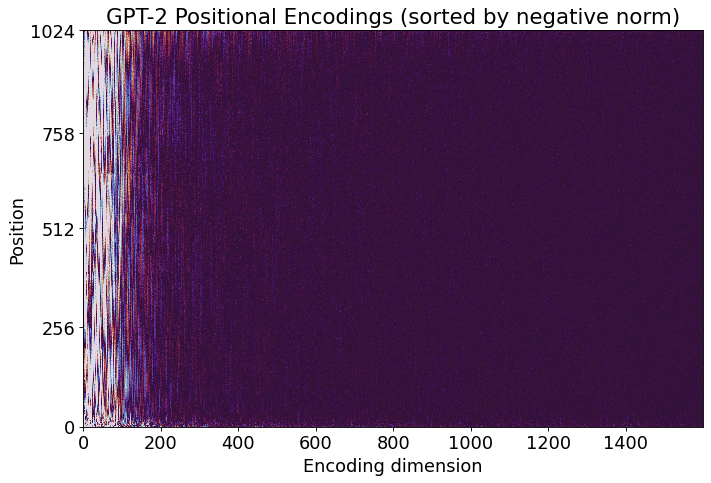

In [21]:
# sort cols by norm (in descending order)
wpe_gpt_sort_idxs = np.argsort(-np.linalg.norm(wpe_gpt, axis=0))
wpe_gpt_sort = wpe_gpt[:,wpe_gpt_sort_idxs]
# plot
plt.imshow(wpe_gpt_sort, vmin=-0.05, vmax=0.05, interpolation="none", origin='lower', cmap=cmap)
plt.yticks([0,256,512,758,1024])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('GPT-2 Positional Encodings (sorted by negative norm)')
plt.show()

### BERT

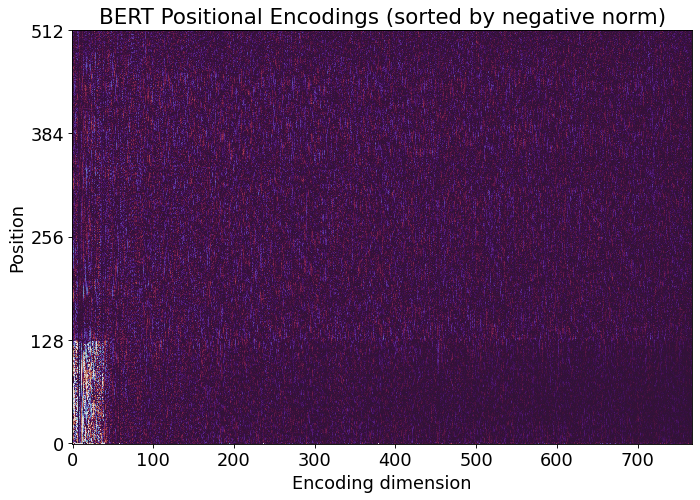

In [22]:
# sort cols by standard deviation (in descending order)
wpe_bert_sort_idxs = np.argsort(-np.linalg.norm(wpe_bert, axis=0))
wpe_bert_sort = wpe_bert[:,wpe_bert_sort_idxs]
# plot
plt.imshow(wpe_bert_sort, vmin=-0.12, vmax=0.12, interpolation="none", origin='lower', cmap=cmap)
plt.yticks([0,128,256,384,512])
plt.xlabel('Encoding dimension')
plt.ylabel('Position')
plt.title('BERT Positional Encodings (sorted by negative norm)')
plt.show()

### Norm of features visualization

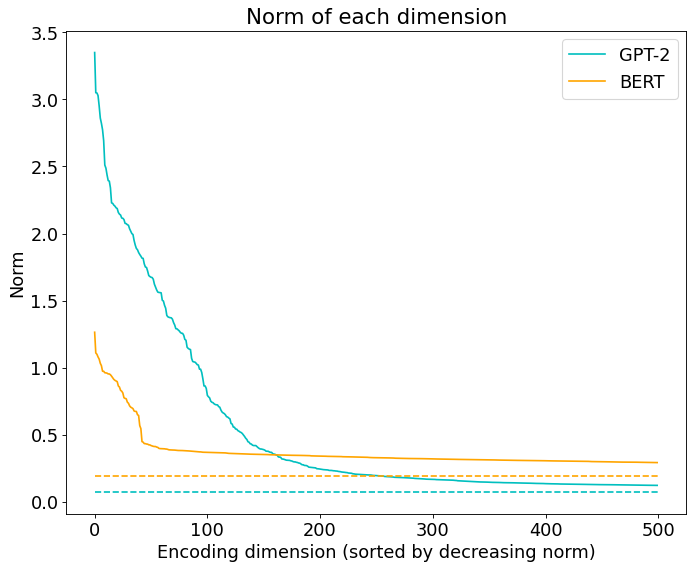

In [23]:
wpe_gpt_sort_norm = np.linalg.norm(wpe_gpt_sort, axis=0)
wpe_bert_sort_norm = np.linalg.norm(wpe_bert_sort, axis=0)
gpt_min_norm = wpe_gpt_sort_norm.min()
bert_min_norm = wpe_bert_sort_norm.min()
plt.plot(wpe_gpt_sort_norm[:500], '-', c='c', label='GPT-2')
plt.plot([0, 500], [gpt_min_norm, gpt_min_norm], '--', c='c')
plt.plot(wpe_bert_sort_norm[:500], '-', c='orange', label='BERT')
plt.plot([0, 500], [bert_min_norm, bert_min_norm], '--', c='orange')
plt.xlabel('Encoding dimension (sorted by decreasing norm)')
plt.ylabel('Norm')
plt.title('Norm of each dimension')
plt.legend()
plt.show()